# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

df = pd.DataFrame()
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [51]:
# Checking the number of mice.
number_mice = merged_data['Mouse ID'].nunique()
number_mice

249

In [52]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicated_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ids = duplicated_mice['Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [53]:
# Optional: Get all the data for the duplicate mouse ID. 
is_duplicate = merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_data = merged_data[is_duplicate]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(subset=['Mouse ID'])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [55]:
# Checking the number of mice in the clean DataFrame.
len(clean_data)

249

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary = summary.rename(columns={'mean': 'Mean Tumor Volume', 
                                  'median': 'Median Tumor Volume', 
                                  'var': 'Tumor Volume Variance', 
                                  'std': 'Tumor Volume Std. Dev.', 
                                  'sem': 'Tumor Volume Std. Err.'})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [57]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
grouped_data = clean_data.groupby('Drug Regimen')
summary_stats = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


## Bar and Pie Charts

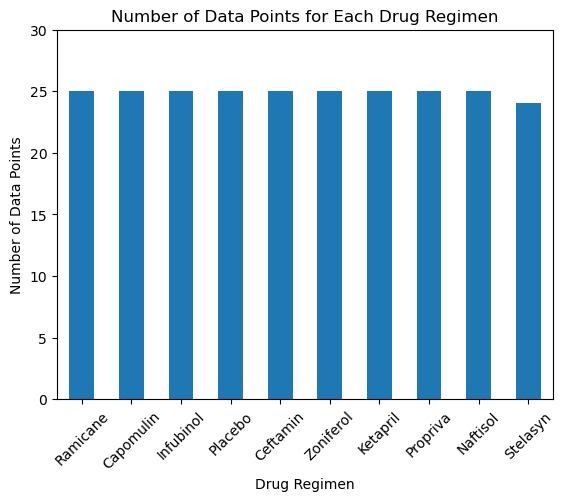

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', rot=45)

#labels and a title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points for Each Drug Regimen')
plt.ylim(0,30)
plt.show()

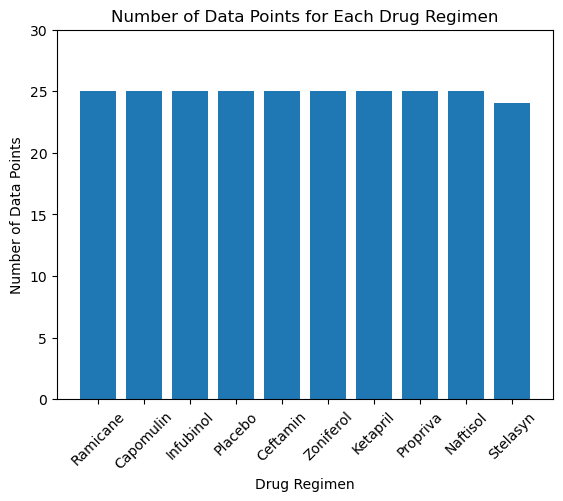

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_data['Drug Regimen'].value_counts()
plt.bar(regimen_counts.index, regimen_counts.values)
plt.xticks(rotation=45)

# Add axis labels and a title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points for Each Drug Regimen')
plt.ylim(0,30)
plt.show()

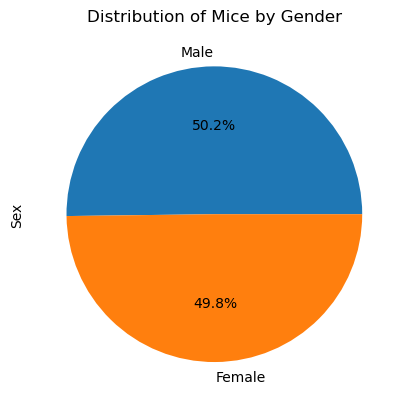

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Mice by Gender')
plt.show()

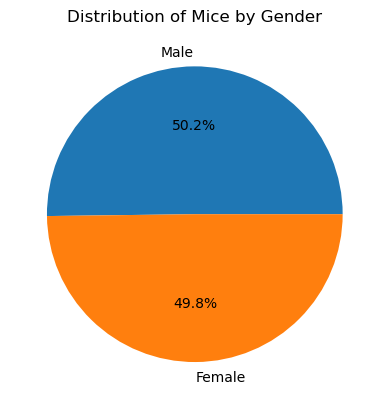

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_data['Sex'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Mice by Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = merged_data.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
filtered_data = merged_data[(merged_data['Drug Regimen'].isin(treatments)) & 
                            (merged_data['Timepoint'].isin(last_timepoints))]
final_tumor_volumes = filtered_data.groupby('Mouse ID')['Tumor Volume (mm3)'].last()
final_tumor_volumes

Mouse ID
a203    67.973419
a251    65.525743
a275    62.999356
a411    38.407618
a444    43.047543
          ...    
y769    68.594745
y793    31.896238
y865    64.729837
z578    30.638696
z581    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [63]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_data = []
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[(merged_data["Drug Regimen"] == treatment) & 
                                      (merged_data["Timepoint"] == 45), "Tumor Volume (mm3)"]

    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

print(f"{treatment} outliers: {outliers}")

Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


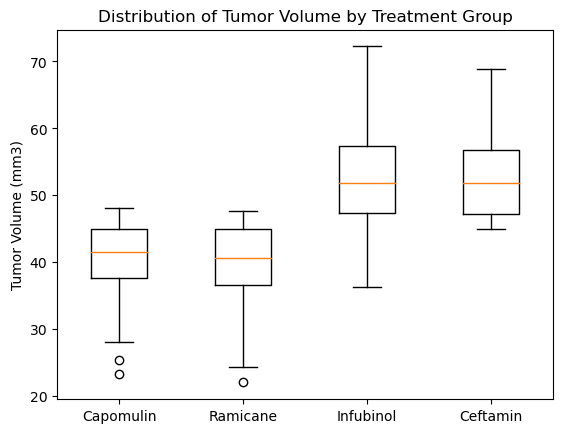

In [68]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_data = [filtered_data.loc[filtered_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]

fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data)

#x-axis tick labels and a title
ax.set_xticklabels(treatments)
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Distribution of Tumor Volume by Treatment Group')

# Show the plot
plt.show()

## Line and Scatter Plots

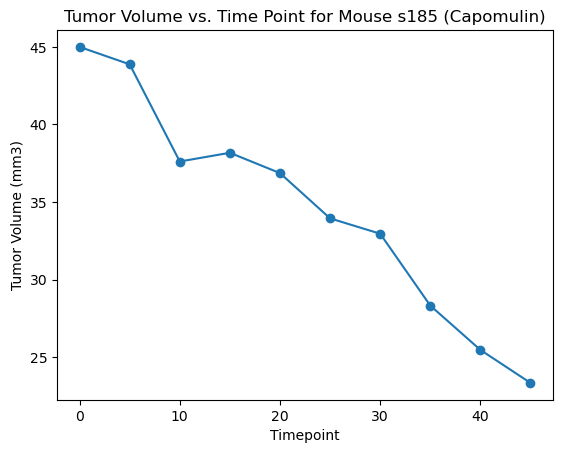

In [70]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

selected_mouse = 's185'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse]

tumor_data = mouse_data[['Timepoint', 'Tumor Volume (mm3)']]

plt.plot(tumor_data['Timepoint'], tumor_data['Tumor Volume (mm3)'], marker='o')

# Add axis labels and a title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time Point for Mouse ' + selected_mouse + ' (Capomulin)')
plt.show()

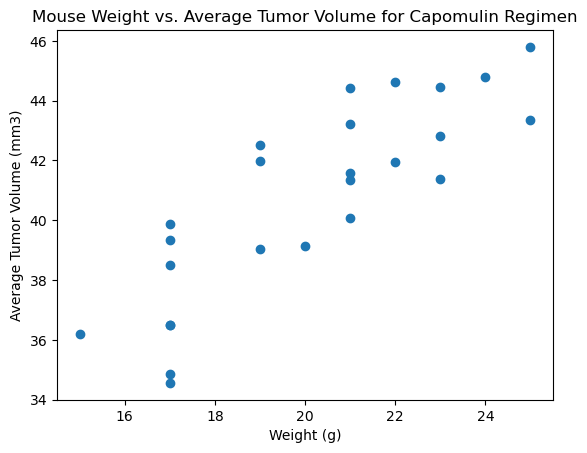

In [71]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin", :]

avg_data = capomulin_data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})

plt.scatter(avg_data["Weight (g)"], avg_data["Tumor Volume (mm3)"])

# Add axis labels and a title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Show the plot
plt.show()

## Correlation and Regression

C:\Temp\ipykernel_38488\3359152988.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_mean = capomulin_data.groupby("Mouse ID").mean()[["Weight (g)", "Tumor Volume (mm3)"]]


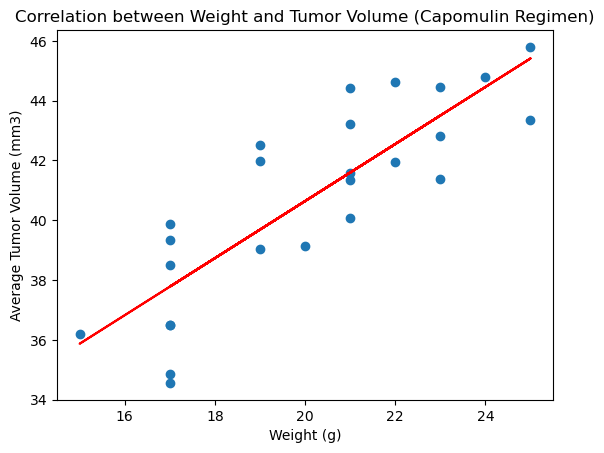

In [73]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]

capomulin_mean = capomulin_data.groupby("Mouse ID").mean()[["Weight (g)", "Tumor Volume (mm3)"]]

# coefficient
r, p_value = st.pearsonr(capomulin_mean["Weight (g)"], capomulin_mean["Tumor Volume (mm3)"])

#linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_mean["Weight (g)"], capomulin_mean["Tumor Volume (mm3)"])

#scatter plot and regression line
plt.scatter(capomulin_mean["Weight (g)"], capomulin_mean["Tumor Volume (mm3)"])
plt.plot(capomulin_mean["Weight (g)"], intercept + slope * capomulin_mean["Weight (g)"], "r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Correlation between Weight and Tumor Volume (Capomulin Regimen)")
plt.show()